# Assignment 2

We start to install all the packages we need and get the data

In [2]:
# Import package 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import linear_model, preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


In [4]:
# Start by getting the data 
DataSet = pd.read_csv("SFPD_Incidents_-_from_1_January_2003.csv")

## 2A

In [5]:
# Lets see what the data looks like 
DataSet.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


## Prepare the data

We want to make dataset that has for each district 
* total number of crimes in 2003 and 2015
* number of vehicle theft in 2003 and 2015
* number of prostituion in 2003 and 2015

We will start to get the year from the column *Date* in the dataset. To do so we will make a function called getYear

In [4]:
#Extract year from date
def getYear(date):
    return int(date.split('/')[2])

# Let's change the column Date so it only includes year
DataSet['Date'] = DataSet['Date'].apply(lambda x: getYear(x))
DataSet.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


Now we need to count the total number of crimes for each District. We make a new dataset called *DataSet2003* and *DataSet2015* there we will store the data needed for the assinment 2A

In [5]:
Df= DataSet[DataSet['Date']==2003].filter(items = ['PdDistrict','Category']).groupby(["PdDistrict"]).count()
Df['Total_2015'] = DataSet[DataSet['Date']==2015].filter(items = ['PdDistrict','Category']).groupby(["PdDistrict"]).count()#.reset_index(name='TotalCrimes')
Df = Df.rename(columns={'Category': 'Total_2003'})
Df.head()

,Total_2003,Total_2015
PdDistrict,,
BAYVIEW,15739,14711
CENTRAL,13622,18565
INGLESIDE,14008,13414
MISSION,21163,18542
NORTHERN,18975,20092


Now we will count the total number of prostituion in each districk

In [6]:
Df['NumPros_2003'] = DataSet[(DataSet['Date']==2003) & (DataSet['Category'] == 'PROSTITUTION')].filter(items = ['PdDistrict','Category']).groupby(["PdDistrict"]).count()
Df['NumPros_2015'] = DataSet[(DataSet['Date']==2015) & (DataSet['Category'] == 'PROSTITUTION')].filter(items = ['PdDistrict','Category']).groupby(["PdDistrict"]).count()
Df.head()


,Total_2003,Total_2015,NumPros_2003,NumPros_2015
PdDistrict,,,,
BAYVIEW,15739,14711,11,7
CENTRAL,13622,18565,70,44
INGLESIDE,14008,13414,5,5
MISSION,21163,18542,713,66
NORTHERN,18975,20092,581,42


Now we will count the total number of vehicle theft in each district

In [7]:
Df['NumVehicle_2003'] = DataSet[(DataSet['Date']==2003) & (DataSet['Category'] == 'VEHICLE THEFT')].filter(items = ['PdDistrict','Category']).groupby(["PdDistrict"]).count()
Df['NumVehicle_2015'] = DataSet[(DataSet['Date']==2015) & (DataSet['Category'] == 'VEHICLE THEFT')].filter(items = ['PdDistrict','Category']).groupby(["PdDistrict"]).count()
Df.head()


,Total_2003,Total_2015,NumPros_2003,NumPros_2015,NumVehicle_2003,NumVehicle_2015
PdDistrict,,,,,,
BAYVIEW,15739,14711,11,7,2121,985
CENTRAL,13622,18565,70,44,1193,552
INGLESIDE,14008,13414,5,5,2319,1368
MISSION,21163,18542,713,66,2063,1198
NORTHERN,18975,20092,581,42,1879,945


In [8]:
Df.to_csv('DataSet.csv')


## 2B
We want to make a dataset for include only the longitude and latitude where the crime type is prostitution. 
**Note:** We know that there are outlier that have longitude and latitude = 90. We will take them out of our data

In [9]:
DataSet_prost = DataSet[(DataSet['Category'] == 'PROSTITUTION') & (DataSet["X"] != 90) & (DataSet["Y"] != 90)]
DataSet_prost = DataSet_prost.filter(items = ["X","Y" ])
DataSet_prost.head()

,X,Y
3639,-122.466205,37.772541
5422,-122.403405,37.775421
6862,-122.409661,37.786439
7560,-122.417956,37.757880
8692,-122.410700,37.786988


Lets plot this to see if everything looks fine

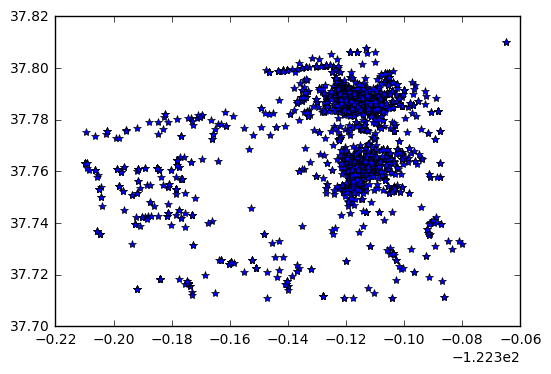

In [10]:
plt.plot(DataSet_prost['X'], DataSet_prost['Y'], '*')
plt.show()


This looks good so no we will do the clustering. We will use *fit* and *labels_* from KMeans to find out in what each point should be in

In [11]:
zip_X_Y = zip(DataSet_prost['X'], DataSet_prost['Y'])

kmeans = []
for i in xrange(2,7,1):
    kmeans.append(KMeans(n_clusters=i).fit(zip_X_Y))

DataSet_prost['KMean2'] = kmeans[0].labels_
DataSet_prost['KMean3'] = kmeans[1].labels_
DataSet_prost['KMean4'] = kmeans[2].labels_
DataSet_prost['KMean5'] = kmeans[3].labels_
DataSet_prost['KMean6'] = kmeans[4].labels_

DataSet_prost.head()

,X,Y,KMean2,KMean3,KMean4,KMean5,KMean6
3639,-122.466205,37.772541,1,2,3,4,5
5422,-122.403405,37.775421,0,0,0,1,3
6862,-122.409661,37.786439,0,0,0,1,3
7560,-122.417956,37.757880,1,1,1,0,0
8692,-122.410700,37.786988,0,0,0,1,3


Lets plot the data to see if everything looks fine

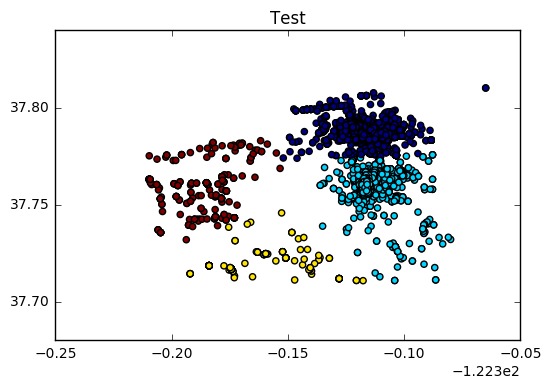

In [12]:
plt.scatter(DataSet_prost['X'], DataSet_prost['Y'], c=DataSet_prost["KMean4"])
plt.title("Test")
plt.show()


Everything looks good so we will make a csv file with our data frame

In [13]:
DataSet_prost.to_csv('DataSet2B_final.csv')

### Centers
Now we will get the location of the cluster center and put it into a csv file. We will start to get the location of the centers with *Center_Location*


In [14]:
Center_Location = []
for i in range(len(kmeans)):
    Center_Location.append(kmeans[i].cluster_centers_.tolist())  



We will make a dataframe with the loacation 

In [15]:
X_center = [[] for x in xrange(5)]
Y_center = [[] for x in xrange(5)]

for i in range(len(Center_Location[:5])):
    X_center[i] = [x[0] for x in Center_Location[i]]
    Y_center[i] = [x[1] for x in Center_Location[i]]
    
Centers = {'X_KMean2' : pd.Series(X_center[0], index=['1', '2']), 'Y_KMean2' : pd.Series(Y_center[0], index=['1', '2']), 'X_KMean3' : pd.Series(X_center[1], index=['1', '2', '3']), 'Y_KMean3' : pd.Series(Y_center[1], index=['1', '2', '3']), 'X_KMean4' : pd.Series(X_center[2], index=['1', '2', '3', '4']), 'Y_KMean4' : pd.Series(Y_center[2], index=['1', '2', '3', '4']), 'X_KMean5' : pd.Series(X_center[3], index=['1', '2', '3', '4', '5']), 'Y_KMean5' : pd.Series(Y_center[3], index=['1', '2', '3', '4', '5']), 'X_KMean6' : pd.Series(X_center[4], index=['1', '2', '3', '4', '5', '6']), 'Y_KMean6' : pd.Series(Y_center[4], index=['1', '2', '3', '4', '5', '6'])}

dfCenters = pd.DataFrame(Centers)
dfCenters.head()

,X_KMean2,X_KMean3,X_KMean4,X_KMean5,X_KMean6,Y_KMean2,Y_KMean3,Y_KMean4,Y_KMean5,Y_KMean6
1,-122.417213,-122.417097,-122.417082,-122.415843,-122.415998,37.787394,37.787425,37.787427,37.761426,37.761710
2,-122.419243,-122.415825,-122.415794,-122.404535,-122.418770,37.760004,37.761346,37.761447,37.785531,37.787654
3,NaN,-122.478115,-122.466325,-122.466325,-122.469521,NaN,37.738906,37.718814,37.718814,37.719174
4,NaN,NaN,-122.486398,-122.418770,-122.404535,NaN,NaN,37.758572,37.787654,37.785531
5,NaN,NaN,NaN,-122.486398,-122.405403,NaN,NaN,NaN,37.758572,37.727578


To color the centers in the same color as the location point we add a color column to our data frame

In [16]:
dfCenters['Color_KMean2'] = [0,1,1,1,1,1]
dfCenters['Color_KMean3'] = [0,1,2,2,2,2]
dfCenters['Color_KMean4'] = [0,1,2,3,3,3]
dfCenters['Color_KMean5'] = [0,1,2,3,4,4]
dfCenters['Color_KMean6'] = [0,1,2,3,4,5]

dfCenters.head()


,X_KMean2,X_KMean3,X_KMean4,X_KMean5,X_KMean6,Y_KMean2,Y_KMean3,Y_KMean4,Y_KMean5,Y_KMean6,Color_KMean2,Color_KMean3,Color_KMean4,Color_KMean5,Color_KMean6
1,-122.417213,-122.417097,-122.417082,-122.415843,-122.415998,37.787394,37.787425,37.787427,37.761426,37.761710,0,0,0,0,0
2,-122.419243,-122.415825,-122.415794,-122.404535,-122.418770,37.760004,37.761346,37.761447,37.785531,37.787654,1,1,1,1,1
3,NaN,-122.478115,-122.466325,-122.466325,-122.469521,NaN,37.738906,37.718814,37.718814,37.719174,1,2,2,2,2
4,NaN,NaN,-122.486398,-122.418770,-122.404535,NaN,NaN,37.758572,37.787654,37.785531,1,2,3,3,3
5,NaN,NaN,NaN,-122.486398,-122.405403,NaN,NaN,NaN,37.758572,37.727578,1,2,3,4,4


Make á csv file

In [17]:
dfCenters.to_csv('DataSet2B_center_final.csv')
